## ***Descrizione Problema***

### ***Problema 1***

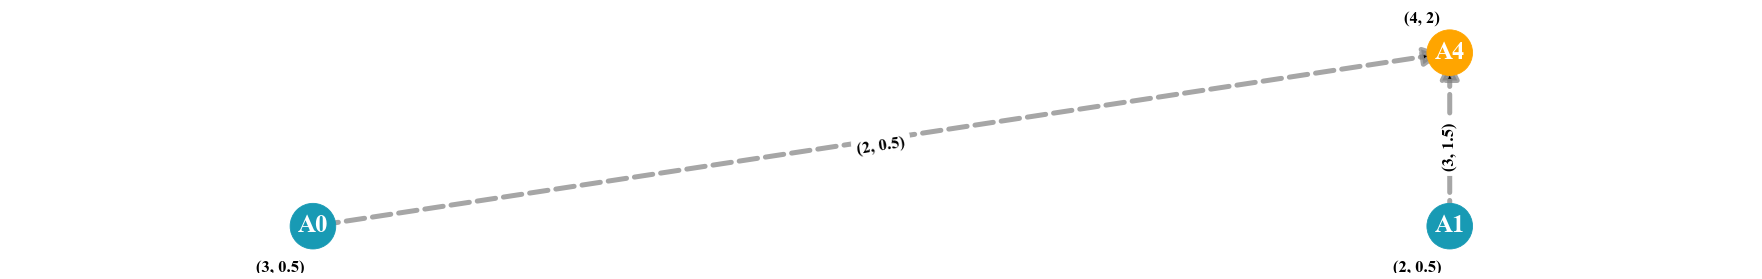

### ***Problema 2***

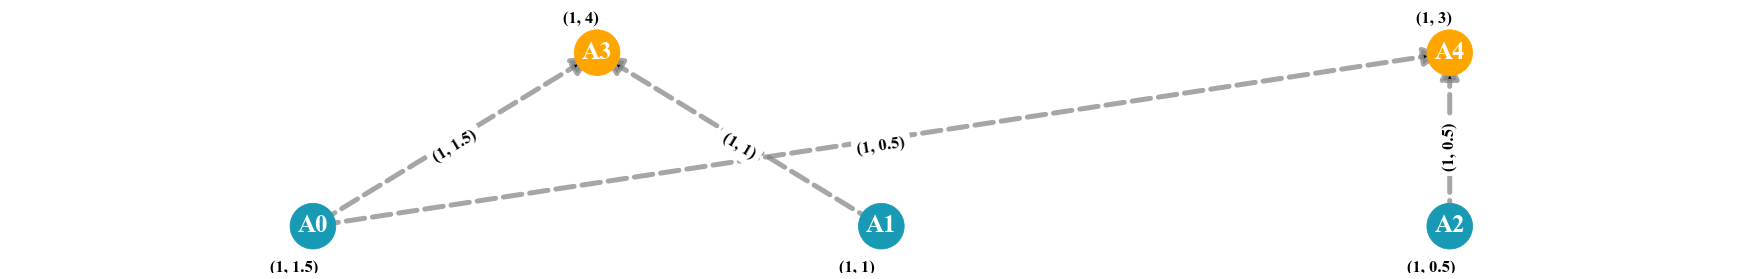

### ***Problema 3***

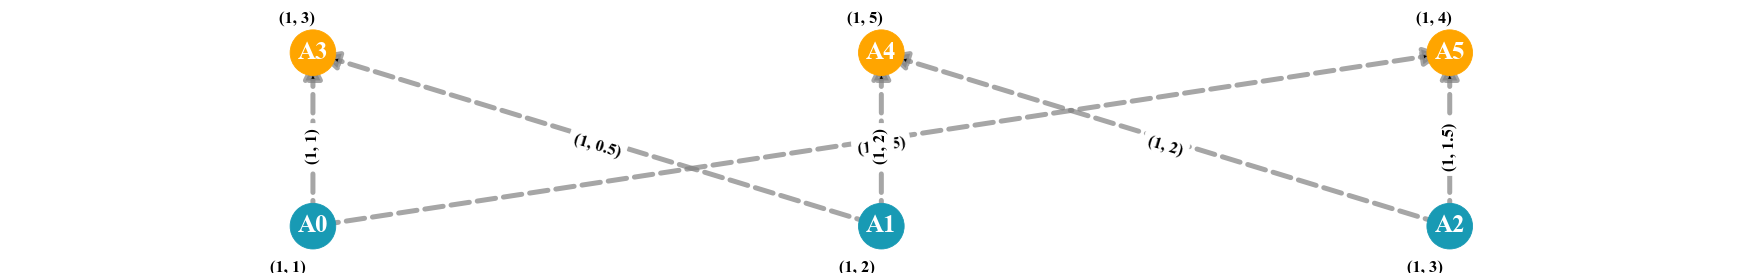

### ***Descrizione***

Nelle figure precedenti sono mostrati degli esempio di grafo dove sono state fatte le seguenti assunzioni:
- Ogni *Seller* ha una coppia ***prezzo - quantitativo***, eventuali offerte multiple sono gestite suddividendole in più nodi appartenenti allo stesso gruppo;
- I ***costi*** del trasporto ***dipendono dalla quantità*** di merce trasportata;
- La merce totale disponibile presso i *Seller* supera la domanda complessiva presso i *Buyer*;

Sia $G(V,A)$ un grafo con $V$ l'insieme dei ***Vertici*** e $A$ l'insieme di ***Archi*** e sia $V_b$ l'insieme di vertici che richiedono le *utility* e $V_s$ l'insieme dei vertiti che offrono le utility e tra questi ci sono alcuni sotto insiemi $V_e$ che afferiscono allo stesso esercizio.

***Variabili*** $$x_{ij} \ \text{rappresenta la quantità di \textit{utility} trasportata dal generico punto vendita} \ i \in V_s \ \text{al generico punto di acquisto} \ j \in V_b$$

***Funzione Obiettivo*** 
$$\text{Maximize} \quad \sum_{j \in V_b} Buy_j \cdot R_{j} - \sum_{i \in V_s}\sum_{j \in V_b}\left(Sell_{i} + Costo_{ij}\right) \cdot x_{ij}$$

***Vincoli*** 

1. La somma della quantità di merce uscente ed entrante in un nodo deve essere pari alla sua ***Richiesta,Disponibilità***: $\hspace{10px} \sum_{(i,q) \in A} x_{iq} - \sum_{(p,i) \in A} x_{pi} = b_i \quad \forall \ i \in V$ 

2. La quantità di ***merce*** che transita sugli archi ***non deve eccedere la capacità dell'arco***: $\hspace{10px} 0 \leq \sum_{i \in V_e} x_{ij} \leq T_{ij} \quad j \in V_b, \ (i,j) \in A, \ V_e \subseteq V_s$

3. La quantità di ***merce*** che transita sugli archi deve essere ***positiva o al più nulla***: $\hspace{10px} x_{ij} \geq 0 \quad \forall \ i \in V_s, \ j \in V_b$

<div style="margin-bottom: 20px;">
  <table align="center">
    <tr>
      <th></th>
      <th>Problema 1</th>
      <th>Problema 2</th>
      <th>Problema 3</th>
    </tr>
    <tr>
      <th>Risparmio Massimo (€)</th>
      <td align="center">2</td>
      <td align="center">4</td>
      <td align="center">2</td>
    </tr>
  </table>
</div>


<center>Table 1: Definizione dei Problemi</center>

***Nota***: Il codice in tutti i casi è eseguito sulla macchina di IBM, quindi i tempi di esecuzione fanno riferimento esclusivamente a queste macchine.

## ***Grafo***

### Import

In [15]:
import json
import random
import networkx as nx
import matplotlib.pyplot as plt

### Definizione della Rete, Seller e Buyer

##### Grafo

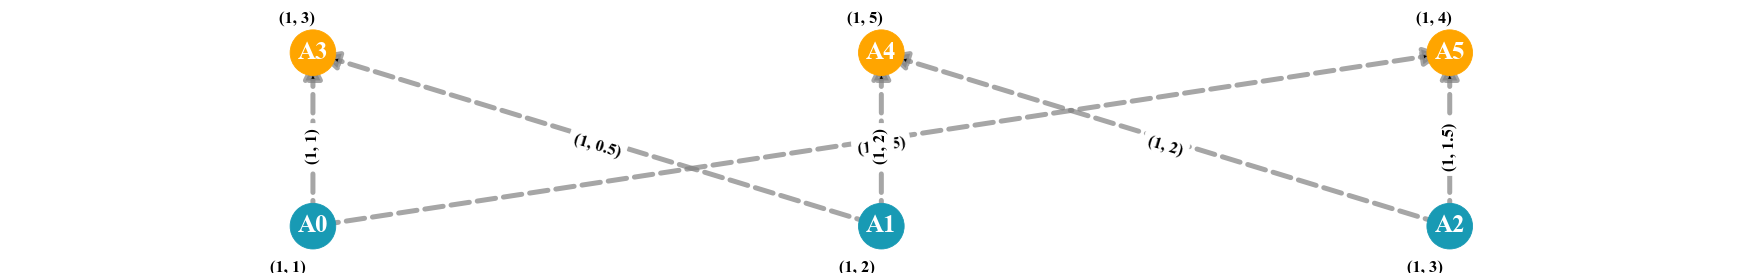

In [16]:
G = nx.DiGraph(); G.graph['Name'] = 'Grafico'; draw = True;  # Variabile per disegnare il grafo

with open('./JSON/Vertex/P3S-V.json') as file:
    json_vertex = file.read()

with open('./JSON/Edges/P3S-E.json') as file:
    json_edges = file.read()

nodes, edges = [], []; sb = []; seller_groups = 0; # [Num_Seller,Num_Buyer], # Num_Seller_Group
vrt = json.loads(json_vertex); edg = json.loads(json_edges)

for i,item in enumerate(vrt):
    if(i == 0):
        sb = vrt[0]['sb']
        seller_groups = vrt[0]['seller_groups']
    else:
        node_name = item["Node_Name"]
        node_attributes = {
            "Prezzo_Unita": item["Prezzo_Unita"],
            "Disponibilita": item["Disponibilita"],
            "group": item["group"]
        }
        nodes.append((node_name, node_attributes))

for item in edg:
    start_node = item["Start_Node_Name"]
    end_node = item["End_Node_Name"]
    edge_attributes = {
        "capacity": item["capacity"],
        "price": item["price"]
    }
    edges.append((start_node, end_node, edge_attributes))

G.add_nodes_from(nodes); G.add_edges_from(edges); 


if(draw):
    fig = plt.figure(figsize=(30,5), dpi=60); ax = plt.gca(); ax.margins(0.20); plt.tight_layout(); pos = {};
    pos = {node: (2/sb[0]*(i+1),0.75) if i < sb[0] else (2/sb[1]*(i%sb[0]+1),1) for i, node in enumerate(G.nodes)} # Funziona se i buyer sono meno dei seller
    pos_node_label = {p:(pos[p][0]-0.05, pos[p][1]-0.05) if i < sb[0] else (pos[p][0]-0.04,pos[p][1]+0.06) for i,p in enumerate(pos)}
    color = ["#189AB4" for _ in range(sb[0])] + ['orange' for _ in range(sb[1])]; pos_edge_label = {p:(pos[p][0],pos[p][1]-0.01) for p in pos}; 
    
    node_labels={n:(d["Disponibilita"],d["Prezzo_Unita"]) for n,d in G.nodes(data=True)}; edge_labels = {(u,v): (d["capacity"],d["price"]) for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edges(G,pos=pos,width=6,arrowsize=45,alpha=0.7,edge_color="gray",style="dashed") # Draw edges
    nx.draw_networkx_edge_labels(G,pos=pos_edge_label,edge_labels=edge_labels,label_pos=0.5,font_size=20,font_family="Times New Roman", font_weight="bold"); # Draw Edges Labels
    nx.draw_networkx_labels(G,pos=pos_node_label,labels=node_labels,font_color="black",font_size=20,font_family="Times New Roman", font_weight="bold",horizontalalignment='left',verticalalignment='top') # Draw Node Labels
    nx.draw(G,pos=pos,with_labels=True,node_size=3000,node_color=color,font_color="white",font_size=30,font_family="Times New Roman", font_weight="bold",width=0) 

### Aggiunta Archi Indiretti

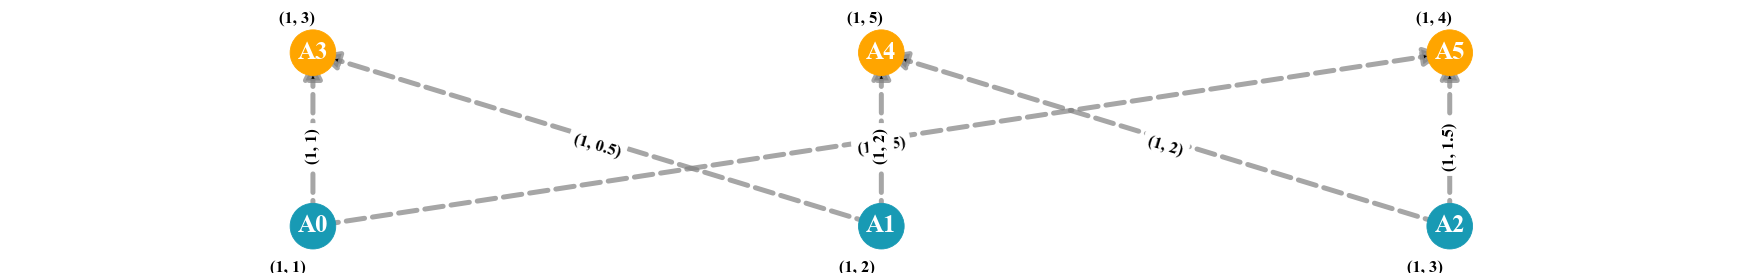

In [17]:
red_edges = [];
for node_start in G.nodes:
    for node_stop in G.nodes:
        if(str(node_start) == str(node_stop).replace("'",'') and "'" in str(node_stop)):
            G.add_edges_from([(str(node_stop),str(node_start),{'capacity':'inf','price':0})])
            red_edges.append((str(node_stop),str(node_start))); #print(node_start,node_stop)

if(draw):
    fig = plt.figure(figsize=(30,5), dpi=60); ax = plt.gca(); ax.margins(0.20); plt.tight_layout();
    edge_labels = {(u,v): (d["capacity"],d["price"]) for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edges(G,pos=pos,width=6,arrowsize=45,alpha=0.7,edge_color="gray",style="dashed") # Draw edges
    nx.draw_networkx_edges(G,pos=pos,width=6,edgelist=red_edges,arrowsize=45,alpha=0.7,edge_color="red",style="dashed") # Draw edges
    nx.draw_networkx_edge_labels(G,pos=pos_edge_label,edge_labels=edge_labels,label_pos=0.5,font_size=20,font_family="Times New Roman", font_weight="bold"); # Draw Edges Labels
    nx.draw_networkx_labels(G,pos=pos_node_label,labels=node_labels,font_color="black",font_size=20,font_family="Times New Roman", font_weight="bold",horizontalalignment='left',verticalalignment='top') # Draw Node Labels
    nx.draw(G,pos=pos,with_labels=True,node_color=color,node_size=3000,font_color="white",font_size=30,font_family="Times New Roman", font_weight="bold",width=0)

## ***Quantum Optimization (QAOA)***

### Import

In [18]:
import time
import numpy as np
from qiskit import Aer
from qiskit.algorithms import QAOA
from qiskit.utils import QuantumInstance
from qiskit_optimization import QuadraticProgram
from qiskit.algorithms.optimizers import ADAM, COBYLA, SLSQP
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.converters import QuadraticProgramToQubo

### Inizializzazione del Modello

In [19]:
# Customized quadratic program with the QuadraticProgram class
transport_problem = QuadraticProgram('Max_Domanda_Offerta'); print(transport_problem.export_as_lp_string());

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max_Domanda_Offerta

Minimize
 obj:
Subject To

Bounds
End



### Creazione Variabili Modello

In [20]:
lower_bound = 0; upper_bound = 1;
transport_problem.integer_var_list(G.number_of_edges(),lowerbound=lower_bound,upperbound=upper_bound,name='x')
print(transport_problem.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max_Domanda_Offerta

Minimize
 obj:
Subject To

Bounds
       x0 <= 1
       x1 <= 1
       x2 <= 1
       x3 <= 1
       x4 <= 1
       x5 <= 1

Generals
 x0 x1 x2 x3 x4 x5
End



### Definizione Funzione Obiettivo

In [21]:
costi = []

# Calcolo dei Costi
for edge in G.edges(data=True): 
    if("'" not in str(edge[0])):
        costi.append(round(edge[2]['price'] + G.nodes[edge[0]]['Prezzo_Unita'],2))
    else: costi.append(0)

linear = {f'x{i}': costi[i] for i in range(G.number_of_edges())}
transport_problem.minimize(linear=linear); print(transport_problem.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max_Domanda_Offerta

Minimize
 obj: 2 x0 + 2.500000000000 x1 + 2.500000000000 x2 + 4 x3 + 5 x4
      + 4.500000000000 x5
Subject To

Bounds
       x0 <= 1
       x1 <= 1
       x2 <= 1
       x3 <= 1
       x4 <= 1
       x5 <= 1

Generals
 x0 x1 x2 x3 x4 x5
End



### Definizione dei Vincoli

#### Vincoli Seller

In [22]:
var_cap_seller = np.zeros((sb[0],G.number_of_edges()),dtype=int); cap_seller = np.zeros((sb[0]),dtype=int);

for i in range(sb[0]):
    vars = []
    for out_edge in G.out_edges(list(G.nodes())[i]): vars.append(list(G.edges).index(out_edge)); var_cap_seller[i][list(G.edges).index(out_edge)] = 1
    for in_edge in G.in_edges(list(G.nodes())[i]): vars.append(-list(G.edges).index(in_edge)); var_cap_seller[i][list(G.edges).index(out_edge)] = -1
    cap_seller[i] = G.nodes[list(G.nodes())[i]]['Disponibilita']
    transport_problem.linear_constraint(linear={f'x{abs(j)}': 1 if j >= 0 else -1 for j in vars}, sense="<=",rhs=cap_seller[i])
print(transport_problem.export_as_lp_string())
#c0: x0 + x1 <= 1
#c1: x2 <= 1
#c2: x5 <= 1

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max_Domanda_Offerta

Minimize
 obj: 2 x0 + 2.500000000000 x1 + 2.500000000000 x2 + 4 x3 + 5 x4
      + 4.500000000000 x5
Subject To
 c0: x0 + x1 <= 1
 c1: x2 + x3 <= 1
 c2: x4 + x5 <= 1

Bounds
       x0 <= 1
       x1 <= 1
       x2 <= 1
       x3 <= 1
       x4 <= 1
       x5 <= 1

Generals
 x0 x1 x2 x3 x4 x5
End



#### Vincoli Buyer

In [23]:
var_cap_buyer = np.zeros((sb[1],G.number_of_edges()),dtype=int); cap_buyer = np.zeros((sb[1]),dtype=int);

# Vincoli Richieste Buyer
for j in range(sb[1]):
    vars = []
    for out_edge in G.out_edges(list(G.nodes())[sb[0]+j]): vars.append(list(G.edges).index(out_edge)); var_cap_buyer[j][list(G.edges).index(out_edge)] = 1
    for in_edge in G.in_edges(list(G.nodes())[sb[0]+j]): vars.append(-list(G.edges).index(in_edge) if list(G.edges).index(in_edge) != 0 else '-0'); var_cap_buyer[j][list(G.edges).index(in_edge)] = -1
    cap_buyer[j] = -G.nodes[list(G.nodes())[sb[0]+j]]['Disponibilita']
    transport_problem.linear_constraint(linear={f'x{abs(int(j))}': 1 if int(j) >= 0 and j != '-0' else -1 for j in vars}, sense="=",rhs=cap_buyer[j])
print(transport_problem.export_as_lp_string())
# c3: - x0 - x2 = -1
# c4: - x1 - x5 = -1

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max_Domanda_Offerta

Minimize
 obj: 2 x0 + 2.500000000000 x1 + 2.500000000000 x2 + 4 x3 + 5 x4
      + 4.500000000000 x5
Subject To
 c0: x0 + x1 <= 1
 c1: x2 + x3 <= 1
 c2: x4 + x5 <= 1
 c3: - x0 - x2 = -1
 c4: - x3 - x4 = -1
 c5: - x1 - x5 = -1

Bounds
       x0 <= 1
       x1 <= 1
       x2 <= 1
       x3 <= 1
       x4 <= 1
       x5 <= 1

Generals
 x0 x1 x2 x3 x4 x5
End



#### Vincoli Capacità Archi

In [24]:
var_cap_tran = np.zeros((0,G.number_of_edges()),dtype=int); cap_tran = np.zeros(0,dtype=int); 
done = [];
for edge1 in G.edges(data=True):
    bin = np.zeros(G.number_of_edges(),dtype=int);
    if("'" not in str(edge1[0])):
        vars = [];
        for edge2 in G.edges(): 
            if(edge1 != edge2 and edge1[1] == edge2[1] and G.nodes[edge1[0]]['group'] == G.nodes[edge2[0]]['group'] and list(G.edges).index(edge2) not in done):
                vars.append(list(G.edges).index(edge2)); done.append(list(G.edges).index(edge2)); bin[list(G.edges).index(edge2)] = 1
        if(vars != []): 
            var_cap_tran = np.append(var_cap_tran,[bin],axis=0); cap_tran = np.append(cap_tran,[edge1[2]['capacity']])
            transport_problem.linear_constraint(linear={f'x{j}': 1 for j in vars}, sense="<=",rhs=edge1[2]['capacity'])
print(transport_problem.export_as_lp_string())
# c5: x0 <= 1
# c6: x1 <= 1
# c7: x2 <= 1
# c8: x3 <= 1

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max_Domanda_Offerta

Minimize
 obj: 2 x0 + 2.500000000000 x1 + 2.500000000000 x2 + 4 x3 + 5 x4
      + 4.500000000000 x5
Subject To
 c0: x0 + x1 <= 1
 c1: x2 + x3 <= 1
 c2: x4 + x5 <= 1
 c3: - x0 - x2 = -1
 c4: - x3 - x4 = -1
 c5: - x1 - x5 = -1
 c6: x0 <= 1
 c7: x1 <= 1
 c8: x2 <= 1
 c9: x3 <= 1
 c10: x4 <= 1
 c11: x5 <= 1

Bounds
       x0 <= 1
       x1 <= 1
       x2 <= 1
       x3 <= 1
       x4 <= 1
       x5 <= 1

Generals
 x0 x1 x2 x3 x4 x5
End



### Conversion to QUBO Problem

In [25]:
# VERY IMPORTANT:  when we run our quantum algorithm to solve this QuadraticProgram, it is converted to a QUBO instance within the Qiskit algorith implementation, implicitly!
qubo_problem = QuadraticProgramToQubo().convert(transport_problem)  # every integer variable, and their associated constraints, are transformed into binary variables suitable for QAOA
print(qubo_problem.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max_Domanda_Offerta

Minimize
 obj: - 127 x0@0 - 126.500000000000 x1@0 - 126.500000000000 x2@0 - 125 x3@0
      - 124 x4@0 - 124.500000000000 x5@0 - 43 c0@int_slack@0 - 43 c1@int_slack@0
      - 43 c2@int_slack@0 - 43 c6@int_slack@0 - 43 c7@int_slack@0
      - 43 c8@int_slack@0 - 43 c9@int_slack@0 - 43 c10@int_slack@0
      - 43 c11@int_slack@0 + [ 129 x0@0^2 + 86 x0@0*x1@0 + 86 x0@0*x2@0
      + 86 x0@0*c0@int_slack@0 + 86 x0@0*c6@int_slack@0 + 129 x1@0^2
      + 86 x1@0*x5@0 + 86 x1@0*c0@int_slack@0 + 86 x1@0*c7@int_slack@0
      + 129 x2@0^2 + 86 x2@0*x3@0 + 86 x2@0*c1@int_slack@0
      + 86 x2@0*c8@int_slack@0 + 129 x3@0^2 + 86 x3@0*x4@0
      + 86 x3@0*c1@int_slack@0 + 86 x3@0*c9@int_slack@0 + 129 x4@0^2
      + 86 x4@0*x5@0 + 86 x4@0*c2@int_slack@0 + 86 x4@0*c10@int_slack@0
      + 129 x5@0^2 + 86 x5@0*c2@int_slack@0 + 86 x5@0*c11@int_slack@0
      + 43 c0@int_slack@0^2 + 43 c1@int_slack@0^2 + 43 c2@in

### Execution

In [26]:
def check_constraint(point): return (np.dot(var_cap_seller,point) <= cap_seller).all() and \
                                    (np.dot(var_cap_buyer,point) == cap_buyer).all() and \
                                    (np.dot(var_cap_tran,point) <= cap_tran).all()

In [29]:
init_points = [0.36, -1.05, -0.4, 2.19, -1.09, 0.49, 1.31, -0.23, -0.21, 0.31]; correct = [0,0,0] #1,5,9
#init_points = [0.36, -1.05]; correct = [0,0]

for k,p in enumerate(range(9,10,4)):
    for init in init_points:
        backend = Aer.get_backend("qasm_simulator"); 
        quantum_instance = QuantumInstance(backend=backend,shots=2048) #,seed_simulator=seed,seed_transpiler=seed) # backend info
        optimizer = COBYLA();  #COBYLA(max_iter=2000,disp=True); 
        initial_point = [init]*p*2 # initial parameters values to start the optimization with
        qaoa = QAOA(optimizer=optimizer,quantum_instance=quantum_instance,reps=p,initial_point=initial_point)

        # we use a wrapper for the optimization process that handles the conversion from a quadratic program to a qubit operator
        eigen_optimizer = MinimumEigenOptimizer(min_eigen_solver=qaoa)
        start_time = time.time()
        result = eigen_optimizer.solve(qubo_problem)
        end_time = time.time()
        execution_time = end_time - start_time

        # Print result
        r_new = np.packbits(np.reshape(result.x[:np.binary_repr(upper_bound).__len__()*G.number_of_edges()].astype(int),(G.number_of_edges(),np.binary_repr(upper_bound).__len__())),bitorder='little',axis=1).flatten()
        if(check_constraint(r_new)): # Se i vincoli sono soddisfatti allora stampa i risultati
            print('\nMinima Spesa:',np.dot(costi,r_new),'€\t\tp:',p,'\tinit:',init)
            for i,edge in enumerate(G.edges()):
                print(f'(Venditore: {edge[0]}, Compratore: {edge[1]}) =','Quantità:',r_new[i])
            #if(r_new == [2,2]).all(): correct[k] += 1 # Problema P1
            #if(r_new == [0,0,1,1]).all(): correct[k] += 1 # Problema P2S
            if(r_new == [0,1,1,0,1,0]).all(): correct[k] += 1 # Problema P3S
        else: 
            print('\nMinima Spesa NON Ottimale:',np.dot(costi,r_new),'€\t\tp:',p,'\tinit:',init)
            for i,edge in enumerate(G.edges()):
                print(f'(Venditore: {edge[0]}, Compratore: {edge[1]}) =','Quantità:',r_new[i])


Minima Spesa: 10.0 €		p: 9 	init: 0.36
(Venditore: A0, Compratore: A3) = Quantità: 0
(Venditore: A0, Compratore: A5) = Quantità: 1
(Venditore: A1, Compratore: A3) = Quantità: 1
(Venditore: A1, Compratore: A4) = Quantità: 0
(Venditore: A2, Compratore: A4) = Quantità: 1
(Venditore: A2, Compratore: A5) = Quantità: 0

Minima Spesa NON Ottimale: 5.0 €		p: 9 	init: -1.05
(Venditore: A0, Compratore: A3) = Quantità: 0
(Venditore: A0, Compratore: A5) = Quantità: 1
(Venditore: A1, Compratore: A3) = Quantità: 1
(Venditore: A1, Compratore: A4) = Quantità: 0
(Venditore: A2, Compratore: A4) = Quantità: 0
(Venditore: A2, Compratore: A5) = Quantità: 0

Minima Spesa: 10.0 €		p: 9 	init: -0.4
(Venditore: A0, Compratore: A3) = Quantità: 0
(Venditore: A0, Compratore: A5) = Quantità: 1
(Venditore: A1, Compratore: A3) = Quantità: 1
(Venditore: A1, Compratore: A4) = Quantità: 0
(Venditore: A2, Compratore: A4) = Quantità: 1
(Venditore: A2, Compratore: A5) = Quantità: 0

Minima Spesa: 10.5 €		p: 9 	init: 2.19

In [30]:
correct

[6, 0, 0]